In [34]:
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data_dir_path = os.path.join('..','data series','Despacho')

In [3]:
data_list = list()
for file_name in os.listdir(data_dir_path):
    file = pd.read_excel(os.path.join(data_dir_path,file_name))
    data_list.append(file)
    print(os.path.join(data_dir_path,file_name),file.shape)

..\data series\Despacho\Despacho_0.xlsx (748392, 4)


In [4]:
full_data = pd.concat(data_list)

In [5]:
full_data.head()

,Fecha,Recurso,Código Agente,kWh
0,2000-12-15 00:00:00,ALBAN,EPSG,0.0
1,2000-12-15 01:00:00,ALBAN,EPSG,0.0
2,2000-12-15 02:00:00,ALBAN,EPSG,0.0
3,2000-12-15 03:00:00,ALBAN,EPSG,0.0
4,2000-12-15 04:00:00,ALBAN,EPSG,0.0


In [6]:
def energia_por_trimestre(X,variable):
    return X.groupby([variable]).sum()

In [7]:
data_por_trimestre = full_data.groupby(pd.Grouper(key="Fecha", freq="3M")).apply(lambda x: energia_por_trimestre(x,'Recurso'))

In [39]:
trimestres

array(['2000-01-31T00:00:00.000000000', '2000-04-30T00:00:00.000000000',
       '2000-07-31T00:00:00.000000000', '2000-10-31T00:00:00.000000000',
       '2001-01-31T00:00:00.000000000', '2001-04-30T00:00:00.000000000',
       '2001-07-31T00:00:00.000000000', '2001-10-31T00:00:00.000000000',
       '2002-01-31T00:00:00.000000000', '2002-04-30T00:00:00.000000000',
       '2002-07-31T00:00:00.000000000', '2002-10-31T00:00:00.000000000',
       '2003-01-31T00:00:00.000000000', '2003-04-30T00:00:00.000000000',
       '2003-07-31T00:00:00.000000000', '2003-10-31T00:00:00.000000000',
       '2004-01-31T00:00:00.000000000', '2004-04-30T00:00:00.000000000',
       '2004-07-31T00:00:00.000000000', '2004-10-31T00:00:00.000000000',
       '2005-01-31T00:00:00.000000000', '2005-04-30T00:00:00.000000000',
       '2005-07-31T00:00:00.000000000', '2005-10-31T00:00:00.000000000',
       '2006-01-31T00:00:00.000000000', '2006-04-30T00:00:00.000000000',
       '2006-07-31T00:00:00.000000000', '2006-10-31

In [30]:
trimestres = pd.unique(data_por_trimestre.index.get_level_values('Fecha'))
recursos_conteo_dict = dict()
recursos_energia_dict = dict()

for trimestre in trimestres:
    trimestre_filtrado = data_por_trimestre.iloc[data_por_trimestre.index.get_level_values('Fecha') == trimestre]
    trimestre_filtrado = trimestre_filtrado.reset_index()
    
    suma_energia_despachada = trimestre_filtrado.groupby(['Recurso']).sum()
    for recurso in pd.unique(trimestre_filtrado['Recurso']):
        if recurso in recursos_conteo_dict:
            recursos_conteo_dict[recurso] += 1
            recursos_energia_dict[recurso] += suma_energia_despachada.loc[recurso].values[0]
        else:
            recursos_conteo_dict[recurso] = 0
            recursos_energia_dict[recurso] = suma_energia_despachada.loc[recurso].values[0]

In [31]:
sorted(recursos_energia_dict.items(), key=lambda x: x[1], reverse=True)

[('CHIVOR', 9008473999.999987),
 ('GUATAPE', 9004428999.999994),
 ('LA TASAJERA', 6498719998.538811),
 ('SAN CARLOS', 6215372499.999953),
 ('GUAVIO', 5709915500.000005),
 ('PAGUA', 4248458000.0000052),
 ('PORCE', 2834581999.9999804),
 ('BETANIA', 2578693000.0000143),
 ('JAGUAS', 2229997500.000013),
 ('ALBAN', 2209629701.46124),
 ('MIEL', 1595797500.0000138),
 ('URRA', 849177100.0),
 ('CALIMA', 313866999.999985),
 ('SOGAMOSO', 261069000.0),
 ('SALVAJINA', 121678000.0),
 ('EL QUIMBO', 85662000.0),
 ('TEBSAB', 45969000.0),
 ('TASAJERO', 1570000.0)]

In [29]:
sorted(recursos_conteo_dict.items(), key=lambda x: x[1], reverse=True)

([('CHIVOR', 80),
  ('LA TASAJERA', 80),
  ('SAN CARLOS', 79),
  ('GUAVIO', 78),
  ('BETANIA', 75),
  ('ALBAN', 74),
  ('GUATAPE', 74),
  ('JAGUAS', 74),
  ('PORCE', 69),
  ('MIEL', 64),
  ('PAGUA', 61),
  ('URRA', 54),
  ('CALIMA', 48),
  ('SALVAJINA', 40),
  ('TEBSAB', 9),
  ('EL QUIMBO', 6),
  ('SOGAMOSO', 3),
  ('TASAJERO', 1)],
 [('CHIVOR', 9008473999.999987),
  ('GUATAPE', 9004428999.999994),
  ('LA TASAJERA', 6498719998.538811),
  ('SAN CARLOS', 6215372499.999953),
  ('GUAVIO', 5709915500.000005),
  ('PAGUA', 4248458000.0000052),
  ('PORCE', 2834581999.9999804),
  ('BETANIA', 2578693000.0000143),
  ('JAGUAS', 2229997500.000013),
  ('ALBAN', 2209629701.46124),
  ('MIEL', 1595797500.0000138),
  ('URRA', 849177100.0),
  ('CALIMA', 313866999.999985),
  ('SOGAMOSO', 261069000.0),
  ('SALVAJINA', 121678000.0),
  ('EL QUIMBO', 85662000.0),
  ('TEBSAB', 45969000.0),
  ('TASAJERO', 1570000.0)])

In [32]:
def pintar_grafica(datos,ax):
    
    explode = np.zeros(len(datos))
    explode[datos['kWh'].argmax()] = 0.1
    
    fecha = datos['Fecha'].dt.date[0].strftime("%Y-%m-%d")
    
    ax.pie(datos['kWh'],explode=explode, labels=datos['Recurso'], autopct='%1.2f%%',
            shadow=True, startangle=90)
    ax.axis('equal')
    ax.set_title('Trimestre {}'.format(fecha))

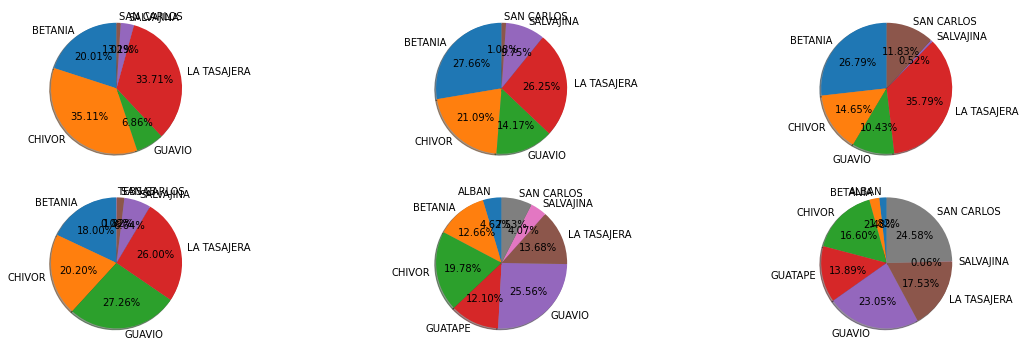

In [36]:
fig, axes= plt.subplots(2, 3,figsize=(20,5))

for i, (ax,trimestre) in enumerate(zip(axes.flatten(),trimestres[:6])):
    trimestre_filtrado = data_por_trimestre.iloc[data_por_trimestre.index.get_level_values('Fecha') == trimestre]
    trimestre_filtrado = trimestre_filtrado.reset_index()
    ax.pie(trimestre_filtrado['kWh'], labels=trimestre_filtrado['Recurso'], autopct='%1.2f%%',
            shadow=True, startangle=90)
    plt.tight_layout()
plt.show()